<a href="https://colab.research.google.com/github/Igor-Basilio/treinamento-h2ia/blob/master/Atividades/2%20.%20Mushroom%20Data%20Set%20ID3/2%20.%200%20Mushroom%20Data%20Set%20ID3%20%7B%20Sklearn%20%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import urllib.request
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz
from IPython.display import IFrame

In [ ]:
# Faz upload do dataset do meu google drive para o colab 
 
!gdown "https://drive.google.com/uc?id=1CYfKf2od19lCdo1Pzu2PkSaL8wwBnP5T" -O "agaricus-lepiota.data"

Downloading...
From: https://drive.google.com/uc?id=1CYfKf2od19lCdo1Pzu2PkSaL8wwBnP5T
To: /content/agaricus-lepiota.data
100% 374k/374k [00:00<00:00, 97.0MB/s]


In [ ]:
# Lendo o arquivo em formato csv com pandas
dados = pd.read_csv("agaricus-lepiota.data" , header = None)

# Mostra o conteudo da váriavel 'dados' 
dados

In [ ]:
# Mudando de string para númerico

dados = dados.apply(LabelEncoder().fit_transform)

dados

In [ ]:
# Criando datasets de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(dados.iloc[:, 1:], dados.iloc[:, 0], test_size=0.3, random_state=42)


In [ ]:
# Cria a árvore 

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

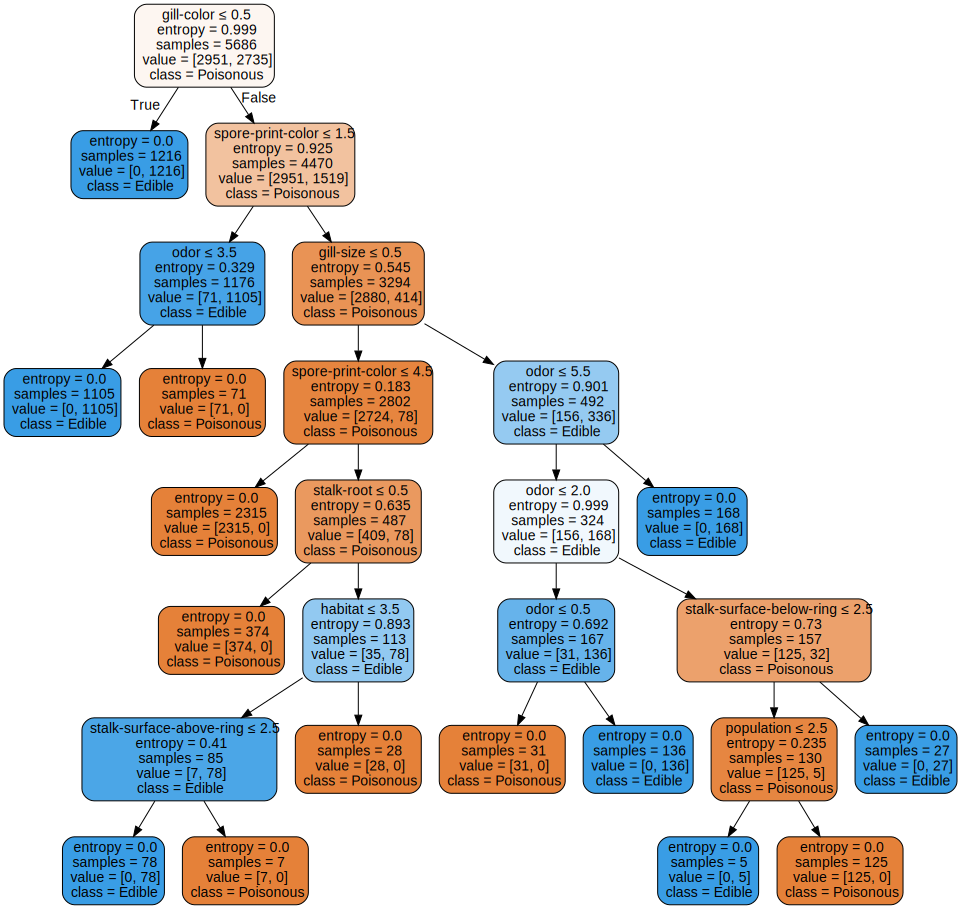

In [ ]:

# Mostra a árvore com a biblioteca graphviz

features=[  "cap-shape",
            "cap-surface",
            "cap-color",
            "bruises",
            "odor",
            "gill-attachment",
            "gill-spacing",
            "gill-size",
            "gill-color",
            "stalk-shape",
            "stalk-root",
            "stalk-surface-above-ring",
            "stalk-surface-below-ring",
            "stalk-color-above-ring",
            "stalk-color-below-ring",
            "veil-type",
            "veil-color",
            "ring-number",
            "ring-type",
            "spore-print-color",
            "population",
            "habitat"                ]


dot_data = export_graphviz(tree, out_file=None, feature_names=features, class_names=['Poisonous' , 'Edible'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')

graph

In [ ]:
# Avalia a árvore

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{conf_matrix}\n\n')

class_report = classification_report(y_test, y_pred)
print(f'Classification report:\n{class_report}')

Accuracy: 1.00


Confusion matrix:
[[1257    0]
 [   0 1181]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

